In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("subset_flux.csv")

In [3]:
wavelength_cols = [col for col in df.columns if col.startswith('WAVELENGTH_')]
flux_cols = [col for col in df.columns if col.startswith('FLUX_')]

wavelengths = df[wavelength_cols].values
fluxes = df[flux_cols].values

# target 52 wavelengths
target_waves = np.array([
    7.275559205, 6.813739109, 6.381233297, 5.976181027, 5.596839672,
    5.241577216, 4.908865239, 4.597272336, 4.305457963, 4.032166667,
    3.723448972, 3.650082317, 3.578161276, 3.507657363, 3.438542655,
    3.370789781, 3.304371905, 3.239262725, 3.175436452, 3.112867809,
    3.051532016, 2.991404779, 2.932462288, 2.874681195, 2.818038619,
    2.762512126, 2.708079723, 2.654719854, 2.602411385, 2.5511336,
    2.500866189, 2.451589246, 2.403283252, 2.355929078, 2.309507968,
    2.264001537, 2.219391762, 2.175660977, 2.13279186, 2.090767435,
    2.049571057, 2.00918641, 1.9695975, 1.883613024, 1.708492539,
    1.549653096, 1.40558104, 1.274903438, 1.156375, 0.95, 0.7, 0.55
])

target_waves = np.sort(target_waves)

# interpolate for each sample
interpolated_fluxes = []
for i in range(len(df)):
    wl = wavelengths[i]
    fl = fluxes[i]
    sort_idx = np.argsort(wl)
    wl = wl[sort_idx]
    fl = fl[sort_idx]
    interp_flux = np.interp(target_waves, wl, fl)
    interpolated_fluxes.append(interp_flux)

interpolated_fluxes = np.array(interpolated_fluxes)

# create new dataframe
df_interpolated = pd.DataFrame(interpolated_fluxes, columns=[f'spec_{i}' for i in range(len(target_waves))])


In [4]:
df_interpolated

,spec_0,spec_1,spec_2,spec_3,spec_4,spec_5,spec_6,spec_7,spec_8,spec_9,...,spec_42,spec_43,spec_44,spec_45,spec_46,spec_47,spec_48,spec_49,spec_50,spec_51
0,0.001012,0.076072,0.051338,0.087838,0.087272,0.086345,0.084120,0.078148,0.067372,0.061082,...,0.018344,0.016116,0.014651,0.012994,0.011574,0.011298,0.011298,0.011298,0.011298,0.011298
1,0.001120,0.075956,0.088571,0.088358,0.087733,0.086129,0.083650,0.078310,0.067304,0.061531,...,0.018477,0.016008,0.014251,0.012793,0.011444,0.011244,0.011244,0.011244,0.011244,0.011244
2,0.001057,0.076413,0.087946,0.088704,0.087419,0.086426,0.084086,0.078367,0.067477,0.061262,...,0.018569,0.016453,0.014122,0.012476,0.011274,0.011141,0.011141,0.011141,0.011141,0.011141
3,0.001141,0.062912,0.088535,0.088239,0.087591,0.086193,0.083736,0.078014,0.067548,0.061263,...,0.018683,0.016390,0.014088,0.013118,0.011848,0.011749,0.011749,0.011749,0.011749,0.011749
4,0.001101,0.069436,0.088038,0.088771,0.087284,0.086702,0.083800,0.078731,0.067413,0.061583,...,0.018585,0.016130,0.014581,0.012430,0.011175,0.010939,0.010939,0.010939,0.010939,0.010939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,0.001117,0.069662,0.087910,0.088248,0.087202,0.086756,0.084138,0.078532,0.067467,0.061215,...,0.018268,0.015697,0.014567,0.013033,0.012312,0.011104,0.011104,0.011104,0.011104,0.011104
3997,0.001140,0.075903,0.088174,0.088455,0.087567,0.086126,0.083804,0.078243,0.067512,0.061535,...,0.018596,0.016259,0.014191,0.013019,0.011722,0.011516,0.011516,0.011516,0.011516,0.011516
3998,0.001135,0.075849,0.088567,0.088326,0.086907,0.086246,0.083808,0.078274,0.067688,0.061047,...,0.018358,0.016455,0.014219,0.012961,0.011362,0.011532,0.011532,0.011532,0.011532,0.011532
3999,0.001095,0.076161,0.087796,0.088253,0.087322,0.085956,0.083729,0.078198,0.067645,0.061505,...,0.018607,0.015968,0.014317,0.012446,0.011637,0.011438,0.011438,0.011438,0.011438,0.011438


In [5]:
df_interpolated.to_csv("Interpolated_WASP-39b.csv")

In [6]:
wavelength = df.loc[4, wavelength_cols].values
flux = df.loc[4, flux_cols].values

In [7]:
interpolated_wavelength = target_waves
interpolated_flux = df_interpolated.loc[4].values

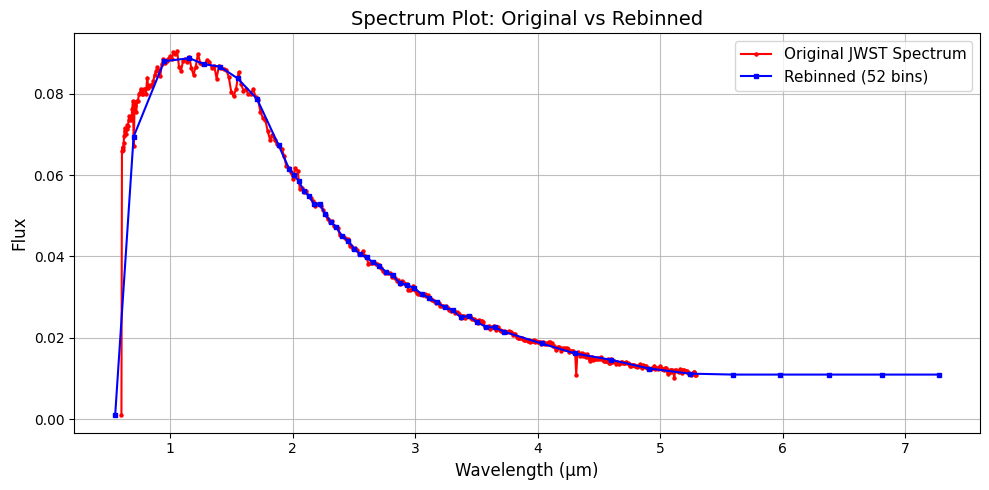

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Original JWST spectrum
plt.plot(
    wavelength,
    flux,
    color="red",
    marker="o",
    markersize=2.2,
    linestyle="-",
    label="Original JWST Spectrum"
)

# Rebinned spectrum
plt.plot(
    interpolated_wavelength,
    interpolated_flux,
    color="blue",
    marker="s",        
    markersize=2.2,
    linestyle="-",
    label="Rebinned (52 bins)"
)

plt.xlabel("Wavelength (µm)", fontsize=12)
plt.ylabel("Flux", fontsize=12)
plt.title("Spectrum Plot: Original vs Rebinned", fontsize=14)

plt.grid(True, alpha=0.8)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()
